# Chapter 8. Dimensionality Reduction

In various Machine Learning scenarios, the inclusion of numerous features per training instance can lead to slow and challenging training processes due to the curse of dimensionality. However, this predicament can often be mitigated in real-world applications by substantially reducing feature counts, thus rendering an initially intractable task more manageable. For instance, in the case of MNIST images, pixels situated along the image periphery can typically be disregarded without significant loss of information. 

Similarly, the correlation between neighboring pixels permits their consolidation into single pixels, contributing to dimensionality reduction. It is important to note that although dimensionality reduction accelerates training, it may marginally affect system performance due to information loss and increased pipeline complexity. Dimensionality reduction's benefits extend beyond hastening training, as it enables effective data visualization, condensing multidimensional datasets into two or three dimensions for graphical representation, aiding pattern recognition and insights.

Additionally, this form of visualization, termed DataViz, serves as a critical tool for conveying findings to non-data scientist stakeholders, especially decision-makers who will utilize the outcomes. This chapter explores the intricacies of the curse of dimensionality and delves into the dynamics of high-dimensional space. Subsequently, it delves into the two core dimensionality reduction methodologies—projection and Manifold Learning. Three prominent techniques for dimensionality reduction—PCA, Kernel PCA, and LLE—are thoroughly examined and discussed, elucidating their applications and impact.

### The Curse of Dimensionality

Our cognitive understanding falters when we attempt to envision high-dimensional spaces, where intuition struggles to grasp the intricacies. Even conceiving a basic 4D hypercube becomes complex, let alone envisaging more dimensions. In such spaces, various phenomena diverge from our accustomed perception. For instance, the behavior of distances between points transforms substantially. In a low-dimensional context like a unit square or cube, randomly chosen points exhibit relatively short average distances between them. However, in a high-dimensional realm, like a 1,000,000-dimensional hypercube, the average distance between two randomly selected points astonishingly stretches out, reflecting the abundant expanse in high dimensions. Consequently, high-dimensional datasets often fall victim to sparsity, rendering training instances widely scattered, thereby undermining the reliability of predictions due to substantial extrapolations.

One potential solution to the challenges posed by high-dimensional spaces is to augment the training set's size, aiming to achieve an adequate density of instances. Nonetheless, practical implementation highlights a daunting reality: the number of training instances required grows exponentially with dimensionality. In the case of just 100 features, considerably fewer than in complex tasks like the MNIST problem, achieving an average distance of 0.1 between instances necessitates more instances than the observable universe's atoms, assuming even distribution across dimensions. This curse of dimensionality underscores the formidable complexity introduced by the amplification of dimensions and the subsequent exponential increase in the demand for training data.

### Main Approaches for Dimensionality Reduction


Two primary approaches to dimensionality reduction, projection, and Manifold Learning, are essential concepts for addressing the curse of dimensionality. Projection involves identifying a lower-dimensional subspace within which training instances predominantly reside, driven by the observation that real-world instances are not uniformly distributed across all dimensions. This is illustrated by projecting a 3D dataset onto a 2D subspace, where instances lie close to a plane, thus reducing dimensionality. 

However, projecting might not be ideal when the subspace twists, as shown by the Swiss roll dataset, where simple projection would distort the data's inherent structure. In contrast, Manifold Learning deals with 2D or d-dimensional manifolds that can be flexibly contorted within a higher-dimensional space. Algorithms in this category aim to model the manifold underlying training instances. The manifold assumption posits that high-dimensional datasets tend to lie near lower-dimensional manifolds, often observed empirically, driven by inherent constraints on data generation. This assumption implies that expressing tasks in a lower-dimensional manifold space could simplify problem-solving. 

This assumption's applicability can vary; while some tasks may indeed be simpler in the manifold space, others could experience increased complexity, contingent on the specific dataset. Dimensionality reduction, though generally beneficial for speeding up model training, may not universally lead to better or simpler solutions, the outcome being contingent upon the dataset's nature.

### PCA

Principal Component Analysis (PCA) stands as a widely adopted dimensionality reduction technique. It operates by initially identifying the hyperplane that exhibits the nearest proximity to the dataset. Following this, PCA proceeds to project the data onto this identified hyperplane. The core principle underlying PCA involves extracting orthogonal axes known as principal components from the original feature space, prioritizing those axes that capture maximum variance in the data. 

These components correspond to directions that effectively represent the dataset's variability. PCA's primary objective is to transform the data into a new coordinate system, where the first principal component aligns with the direction of greatest variance, the second principal component becomes orthogonal to the first and captures the next highest variance, and so on. This transformation results in reduced dimensions, allowing for a compact representation of the data while preserving the most significant variance.

In summary, PCA seeks to simplify the complexity of high-dimensional data by projecting it onto a lower-dimensional subspace defined by principal components. These components are chosen to encapsulate the most substantial variability within the dataset, enabling a streamlined representation that retains essential information while shedding the less informative dimensions.

In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Building a simple 3D dataset:

In [33]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

Principal Components

In [34]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [35]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [36]:
np.allclose(X_centered, U.dot(S).dot(Vt))


True

Projecting Down to d Dimensions

In [37]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [38]:
X2D_using_svd = X2D


Using Scikit-Learn

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [40]:
X2D[:5]


array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [41]:
X2D_using_svd[:5]


array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])


Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:

In [42]:
np.allclose(X2D, -X2D_using_svd)


True

In [43]:
X3D_inv = pca.inverse_transform(X2D)


In [44]:
np.allclose(X3D_inv, X)


False

In [45]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))


0.010170337792848547

In [46]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])


In [47]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)


True

In [48]:
pca.components_


array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [49]:
Vt[:2]


array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [50]:
pca.explained_variance_ratio_


array([0.84248607, 0.14631839])

In [51]:
1 - pca.explained_variance_ratio_.sum()


0.011195535570688975

In [52]:
np.square(s) / np.square(s).sum()


array([0.84248607, 0.14631839, 0.01119554])

In [53]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [54]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

Saving figure dataset_2d_plot


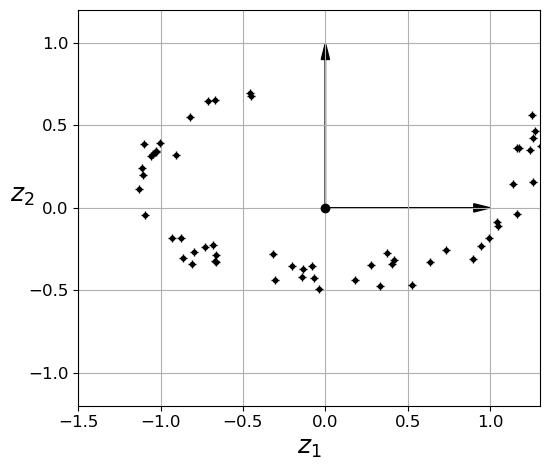

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")

In [57]:

from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

Saving figure swiss_roll_plot


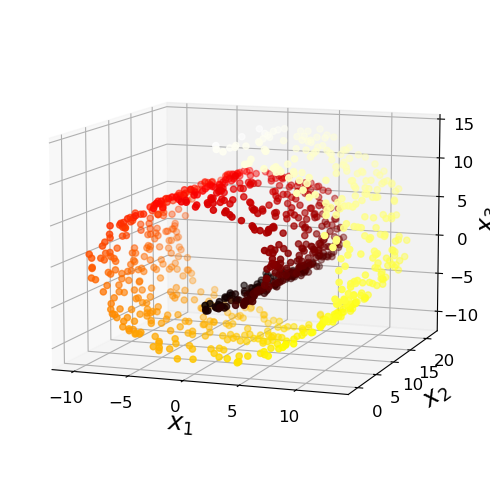

In [58]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("swiss_roll_plot")
plt.show()

Saving figure squished_swiss_roll_plot


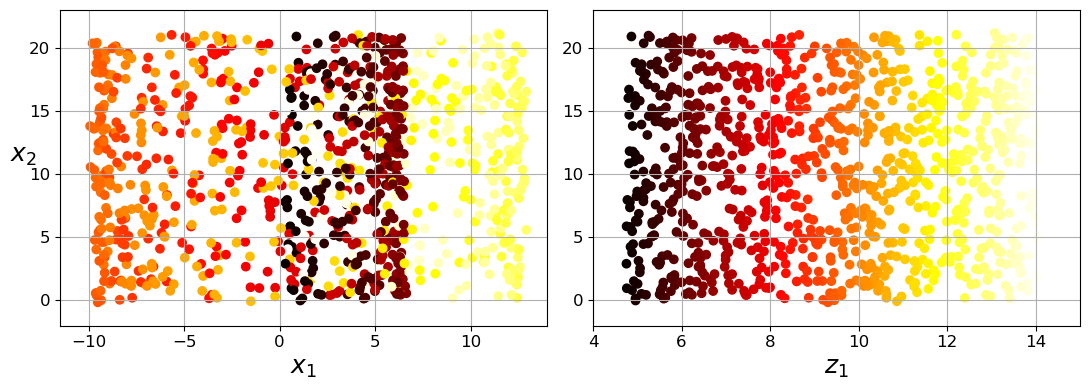

In [59]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

Saving figure manifold_decision_boundary_plot1


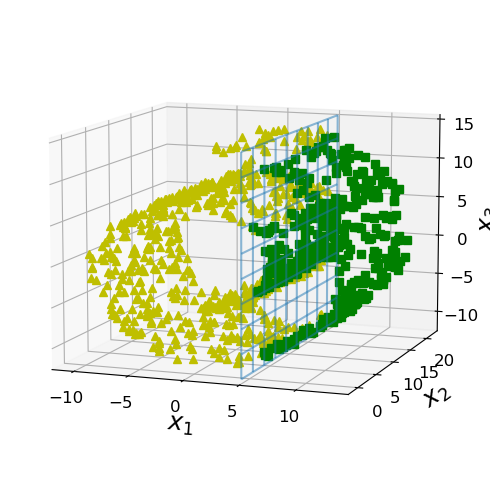

Saving figure manifold_decision_boundary_plot2


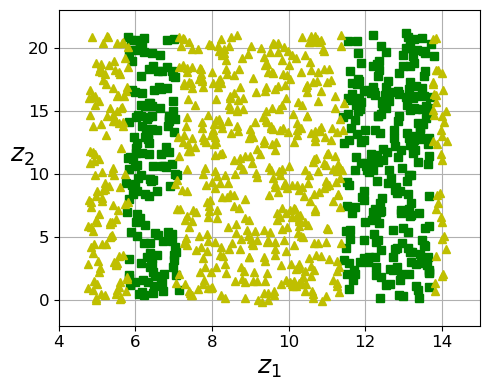

Saving figure manifold_decision_boundary_plot3


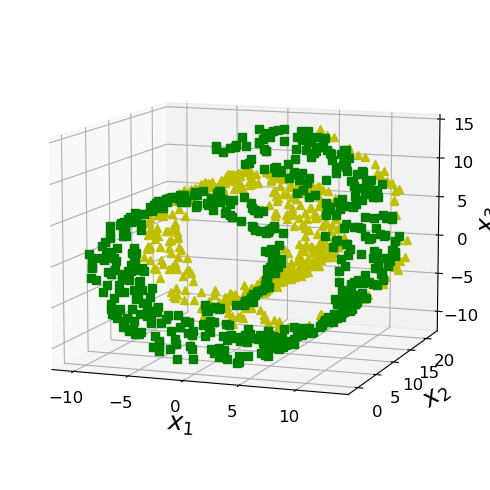

Saving figure manifold_decision_boundary_plot4


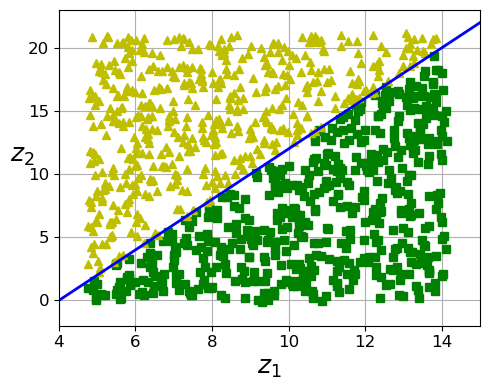

In [60]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot4")
plt.show()

Saving figure pca_best_projection_plot


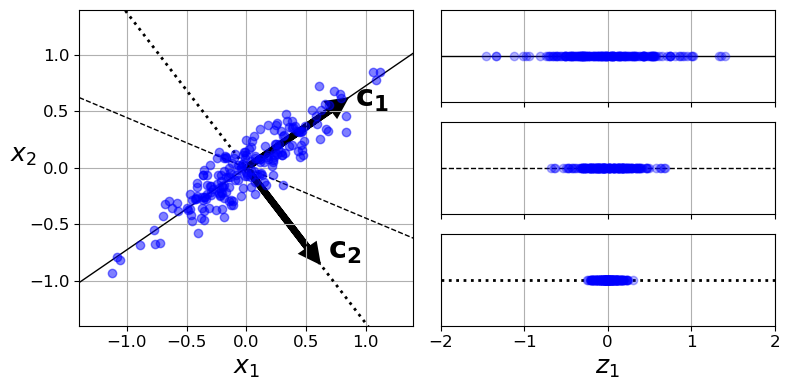

In [61]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()